In [98]:
from scipy.stats import binom, norm
from scipy.integrate import quad
import numpy as np

N = 100
A = 1
R = 0
M = 1
q = 0.02
rho = 0.5

tranches = [[1,3],[4, 6],[7,9]]

def p(M, rho, lims):
    qM = norm.cdf((norm.ppf(q)-np.sqrt(rho)*M)/(np.sqrt(1-rho)))
    pN = binom(N, qM)
    prob = 3*(pN.cdf(N) - pN.cdf(lims[1]-1))
    for i in range(1, 3):#lims[1]-lims[0]+1):
        prob += i*pN.pmf(i+lims[0]-1)        
    return norm.pdf(M)*prob

res = [[],[],[]]
for i in range(len(tranches)):
    for rho in np.arange(0, 1.05, 0.20):
        if rho == 1.0:
            rho = 0.99
        v = quad(p, -np.inf, np.inf, args=(rho, tranches[i]))
        res[i].append(v[0])

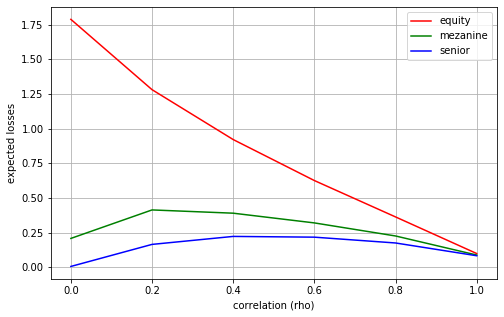

In [99]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(np.arange(0, 1.05, 0.20), res[0], label="equity", color='red')
plt.plot(np.arange(0, 1.05, 0.20), res[1], label="mezanine", color='green')
plt.plot(np.arange(0, 1.05, 0.20), res[2], label="senior", color='blue')
plt.grid(True)
plt.xlabel("correlation (rho)")
plt.ylabel("expected losses")
plt.legend()
plt.show()

In [72]:
N=2
q = [2/100. for i in range(0, N+1)]
p = [0 for _ in range(0, N+1)]
p[0] = (1-q[1])
p[1] = q[1]

for i in range(2, N+1):
    for j in range(1, i+1):
        p[j] = p[j-1]*q[i] + p[j]*(1-q[i])
    p[0] += (1-q[i])
    
print (p)

[1.96, 0.0392, 0.000784]
